In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [55]:
# Load your dataset
data = pd.read_csv("../Dataset/Dataset.csv", na_values="?")
data

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.0,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.0,0.0,0.0,NaN,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.0,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.0,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.0,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,35.0,60,1.020,0,0,1,1.0,0.0,0.0,131.0,...,41.0,16700,4.80,0.0,0,0.0,1.0,0.0,0.0,1
10317,58.0,60,1.020,0,0,1,1.0,0.0,0.0,NaN,...,52.0,9200,3.40,1.0,0,0.0,1.0,0.0,0.0,1
10318,61.0,60,1.020,0,0,1,1.0,0.0,0.0,99.0,...,47.0,8406,4.71,0.0,0,0.0,1.0,0.0,0.0,1
10319,30.0,60,1.025,0,0,1,1.0,0.0,0.0,102.0,...,42.0,2600,2.80,1.0,0,0.0,1.0,0.0,0.0,1


In [56]:
# Preprocessing
# Handle missing values
data = data.fillna(method='ffill')

In [57]:
# Encode categorical variables
categorical_cols = ['Rbc', 'Pc', 'Pcc', 'Ba', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [58]:
# Normalize numerical features
numerical_cols = ['Age', 'Bp', 'Sg', 'Al', 'Su', 'Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [59]:
# Create sequences for time-series data
sequence_length = 5  # Choose an appropriate sequence length
sequences = []
labels = []

In [60]:
# Split the data into training, validation, and test sets
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [61]:
# Build a basic feedforward neural network
model_ffnn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),     # Hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer (assuming 2 classes)
])

In [62]:
model_ffnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Train the FFNN model
num_epochs = 50
batch_size = 32

history_ffnn = model_ffnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
226/226 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8973 - val_loss: 0.2026 - val_accuracy: 0.9128
Epoch 2/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9373 - val_loss: 0.1967 - val_accuracy: 0.9231
Epoch 3/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9423 - val_loss: 0.1828 - val_accuracy: 0.9360
Epoch 4/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.9424 - val_loss: 0.1751 - val_accuracy: 0.9373
Epoch 5/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9455 - val_loss: 0.1653 - val_accuracy: 0.9335
Epoch 6/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9474 - val_loss: 0.1658 - val_accuracy: 0.9315
Epoch 7/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9510 - val_loss: 0.1575 - val_accuracy: 0.9438
Epoch 

In [64]:
# Build a Convolutional Neural Network (CNN)
model_cnn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Reshape((X_train.shape[1], 1)),    # Reshape for 1D convolution
    layers.Conv1D(32, kernel_size=3, activation='relu'),  # Convolutional layer
    layers.MaxPooling1D(pool_size=2),  # Max-pooling layer
    layers.Flatten(),  # Flatten for fully connected layers
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(2, activation='softmax')  # Output layer (assuming 2 classes)
])

In [65]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
# Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
226/226 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.8715 - val_loss: 0.2171 - val_accuracy: 0.9193
Epoch 2/50
226/226 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9240 - val_loss: 0.1907 - val_accuracy: 0.9218
Epoch 3/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1957 - accuracy: 0.9270 - val_loss: 0.2328 - val_accuracy: 0.9018
Epoch 4/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1887 - accuracy: 0.9318 - val_loss: 0.1687 - val_accuracy: 0.9412
Epoch 5/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9388 - val_loss: 0.1714 - val_accuracy: 0.9380
Epoch 6/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9383 - val_loss: 0.1690 - val_accuracy: 0.9302
Epoch 7/50
226/226 [==============================] - 1s 2ms/step - loss: 0.1686 - accuracy: 0.9416 - val_loss: 0.1625 - val_accuracy: 0.9328
Epoch 

In [67]:
# Evaluate both models
test_loss_ffnn, test_accuracy_ffnn = model_ffnn.evaluate(X_test, y_test)
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test, y_test)

49/49 [==============================] - 0s 1ms/step - loss: 0.1571 - accuracy: 0.9509


In [68]:
# Generate accuracy charts
def plot_accuracy(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

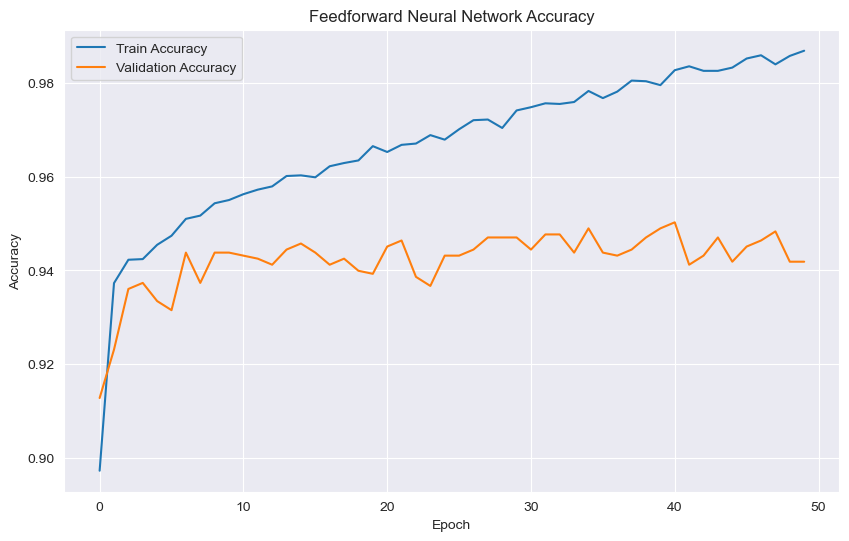

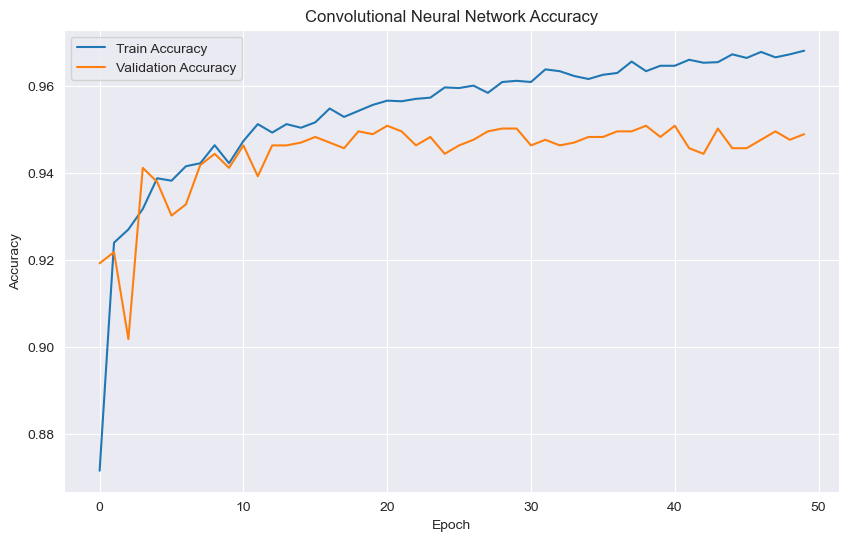

In [69]:
plot_accuracy(history_ffnn, 'Feedforward Neural Network Accuracy')
plot_accuracy(history_cnn, 'Convolutional Neural Network Accuracy')

In [70]:
print(f"Feedforward Neural Network Test Accuracy: {test_accuracy_ffnn}")
print(f"Convolutional Neural Network Test Accuracy: {test_accuracy_cnn}")

Feedforward Neural Network Test Accuracy: 0.9412524104118347
Convolutional Neural Network Test Accuracy: 0.9509360790252686


In [71]:
for i in range(len(data) - sequence_length):
    sequence = data.iloc[i:i+sequence_length]
    label = data.iloc[i+sequence_length]['Class']
    sequences.append(sequence.values)
    labels.append(label)

X = np.array(sequences)
y = np.array(labels)

In [72]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [73]:
# Build an LSTM model
model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    layers.LSTM(64),
    layers.Dense(2, activation='softmax')  # Output layer (assuming 2 classes)
])

In [74]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
# Train the LSTM model
num_epochs = 50
batch_size = 32

In [76]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
226/226 [==============================] - 5s 9ms/step - loss: 0.1185 - accuracy: 0.9681 - val_loss: 0.0578 - val_accuracy: 0.9877
Epoch 2/50
226/226 [==============================] - 1s 5ms/step - loss: 0.0341 - accuracy: 0.9906 - val_loss: 0.0264 - val_accuracy: 0.9935
Epoch 3/50
226/226 [==============================] - 1s 5ms/step - loss: 0.0219 - accuracy: 0.9950 - val_loss: 0.0214 - val_accuracy: 0.9955
Epoch 4/50
226/226 [==============================] - 1s 5ms/step - loss: 0.0168 - accuracy: 0.9953 - val_loss: 0.0148 - val_accuracy: 0.9968
Epoch 5/50
226/226 [==============================] - 1s 5ms/step - loss: 0.0122 - accuracy: 0.9974 - val_loss: 0.0137 - val_accuracy: 0.9961
Epoch 6/50
226/226 [==============================] - 1s 5ms/step - loss: 0.0105 - accuracy: 0.9978 - val_loss: 0.0227 - val_accuracy: 0.9955
Epoch 7/50
226/226 [==============================] - 1s 5ms/step - loss: 0.0097 - accuracy: 0.9975 - val_loss: 0.0138 - val_accuracy: 0.9968
Epoch 

In [77]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

49/49 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9974


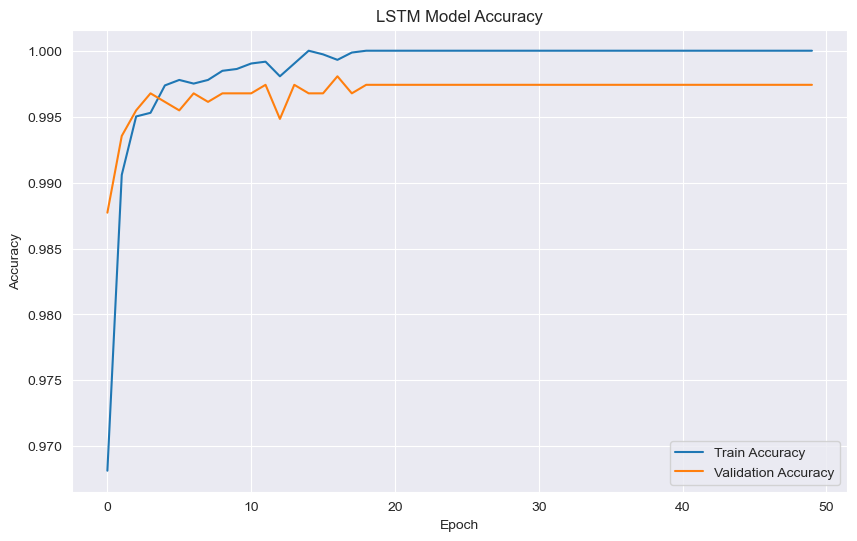

LSTM Model Test Accuracy: 0.9974160194396973


In [78]:
# Generate accuracy charts
def plot_accuracy(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_accuracy(history, 'LSTM Model Accuracy')

print(f"LSTM Model Test Accuracy: {test_accuracy}")